In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Data Understanding step by step

#### load the label data

In [4]:
label_file_path = "../../Dataset/CodeAid_Source_Codes_Labeling.xlsx"
label_data = pd.read_excel(label_file_path)

In [3]:
label_data

,coding_problem_id,llm_answer_id,plagiarism_score
0,source_code_000,gpt-3.5-turbo_00,0.0
1,source_code_000,gpt-3.5-turbo_01,0.0
2,source_code_000,gpt-4_00,0.0
3,source_code_000,gpt-4_01,0.0
4,source_code_000,gpt-4-turbo_00,0.0
...,...,...,...
373,source_code_062,gpt-3.5-turbo_01,0.3
374,source_code_062,gpt-4_00,0.3
375,source_code_062,gpt-4_01,0.3
376,source_code_062,gpt-4-turbo_00,0.3


#### 2. Load an JSON Metada data file for example

In [5]:
json_file_path = '..\..\Dataset\dataset-source-codes\source_code_000\source_code_000.json'
with open(json_file_path, 'r') as file:
    json_metadata = json.load(file)

In [6]:
json_metadata

{'ic_id': 75,
 'ica_id': 688,
 'question': 'Write a program to find the largest element in an array.',
 'rules': ['The array can have duplicate elements.'],
 'examples': 'Input: [1, 4, 2, 9, 5]\nOutput: 9',
 'programming_language': 'Java',
 'response_time': 405,
 'score': 2,
 'score_range': 3,
 'weight': 100.0,
 'total_weight': 150.0}

#### Example source code fole


In [7]:
#### 3. Load an JSON Metada data file for example
candidate_code_path = "..\..\Dataset\dataset-source-codes\source_code_000\source_code_000.jav"
ai_code_path = "..\..\Dataset\dataset-source-codes\source_code_000\source_code_000_gpt-3.5-turbo_00.jav"

In [8]:
candidate_code = Path(candidate_code_path).read_text()
ai_code = Path(ai_code_path).read_text()

#### Extract for getting insight and visualizations

In [9]:
plagiarism_scores = label_data['plagiarism_score']

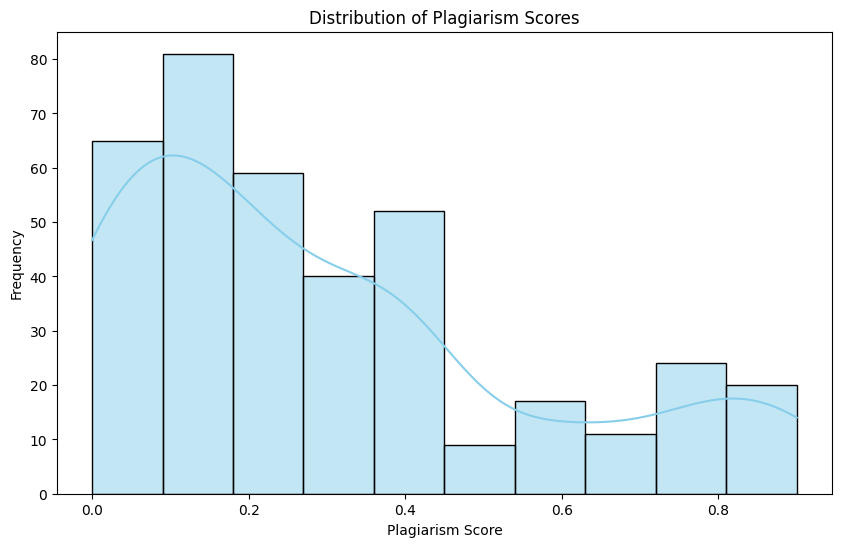

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(plagiarism_scores, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Plagiarism Scores')
plt.xlabel('Plagiarism Score')
plt.ylabel('Frequency')
plt.show()

In [11]:
label_data_head = label_data.head()
json_metadata_summary = json_metadata

In [12]:
# Compare code with AI-generated code using a consine similarity
vectorizer = CountVectorizer().fit_transform([candidate_code, ai_code])
cos_similarity = (vectorizer * vectorizer.T).toarray()[0, 1]

# Display outputs
{
    "Label Data Head": label_data_head,
    "JSON Metadata": json_metadata_summary,
    "Cosine Similarity (Human Candidate vs AI)": cos_similarity
}

{'Label Data Head':   coding_problem_id     llm_answer_id  plagiarism_score
 0   source_code_000  gpt-3.5-turbo_00               0.0
 1   source_code_000  gpt-3.5-turbo_01               0.0
 2   source_code_000          gpt-4_00               0.0
 3   source_code_000          gpt-4_01               0.0
 4   source_code_000    gpt-4-turbo_00               0.0,
 'JSON Metadata': {'ic_id': 75,
  'ica_id': 688,
  'question': 'Write a program to find the largest element in an array.',
  'rules': ['The array can have duplicate elements.'],
  'examples': 'Input: [1, 4, 2, 9, 5]\nOutput: 9',
  'programming_language': 'Java',
  'response_time': 405,
  'score': 2,
  'score_range': 3,
  'weight': 100.0,
  'total_weight': 150.0},
 'Cosine Similarity (Human Candidate vs AI)': np.int64(30)}

### EDA for the Preprocessed Data

In [13]:
file_path = '../results/preprocessed_All_code_metadata.csv'
df = pd.read_csv(file_path)

## Display basic information
# Display basic information
print("Dataset Info:")
print(df.info())

print("\nSample Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   coding_problem_id     378 non-null    object
 1   question              378 non-null    object
 2   example               372 non-null    object
 3   programming_language  378 non-null    object
 4   response_time         378 non-null    int64 
 5   llm_answer_id         378 non-null    object
 6   candidate_answer      378 non-null    object
 7   ai_generated_answer   378 non-null    object
dtypes: int64(1), object(7)
memory usage: 23.8+ KB
None

Sample Rows:
  coding_problem_id                                           question  \
0   source_code_000  Write a program to find the largest element in...   
1   source_code_000  Write a program to find the largest element in...   
2   source_code_000  Write a program to find the largest element in...   
3   source_code_

In [15]:
## General statistic
# Check for missing values

print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics (Numerical Columns):")
print(df.describe())

# Value counts for categorical columns
print("\nProgramming Language Counts:")
print(df['programming_language'].value_counts())

print("\nAI Model Counts:")
print(df['llm_answer_id'].value_counts())


Missing Values:
coding_problem_id       0
question                0
example                 6
programming_language    0
response_time           0
llm_answer_id           0
candidate_answer        0
ai_generated_answer     0
dtype: int64

Summary Statistics (Numerical Columns):
       response_time
count     378.000000
mean      588.015873
std       696.915375
min         5.000000
25%       104.000000
50%       300.000000
75%       932.000000
max      3600.000000

Programming Language Counts:
programming_language
JavaScript          126
Python               60
Java                 36
TypeScript           36
C++                  24
PHP                  18
Dart                 12
Docker               12
Swift                 6
SQL                   6
Kotlin                6
React                 6
C#                    6
JavaScript-React      6
HTML/CSS              6
PHP & JavaScript      6
Go                    6
Name: count, dtype: int64

AI Model Counts:
llm_answer_id
3.5-turbo_00   

In [16]:
# Calculate lengths of candidate and AI-generated answers
df['candidate_length'] = df['candidate_answer'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
df['ai_generated_length'] = df['ai_generated_answer'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Summary of lengths
print("\nCode Length Summary:")
print(df[['candidate_length', 'ai_generated_length']].describe())


Code Length Summary:
       candidate_length  ai_generated_length
count        378.000000           378.000000
mean          85.936508           109.973545
std           62.836879            65.944670
min            1.000000             2.000000
25%           34.000000            64.250000
50%           72.000000            98.500000
75%          127.000000           144.000000
max          258.000000           438.000000


In [17]:
# Response time distribution
print("\nResponse Time Distribution:")
print(df['response_time'].describe())



Response Time Distribution:
count     378.000000
mean      588.015873
std       696.915375
min         5.000000
25%       104.000000
50%       300.000000
75%       932.000000
max      3600.000000
Name: response_time, dtype: float64


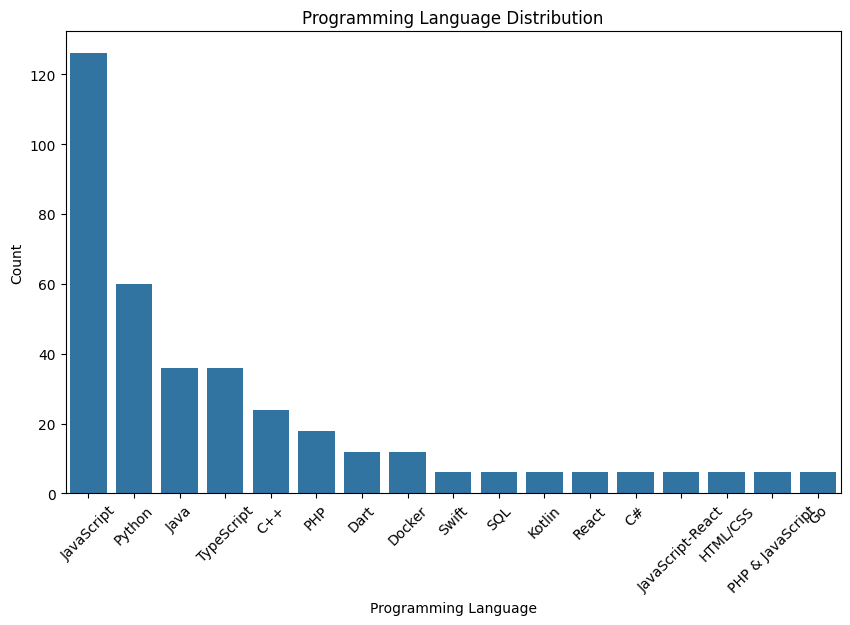

In [18]:
# Bar chart for programming languages
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='programming_language', order=df['programming_language'].value_counts().index)
plt.title('Programming Language Distribution')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

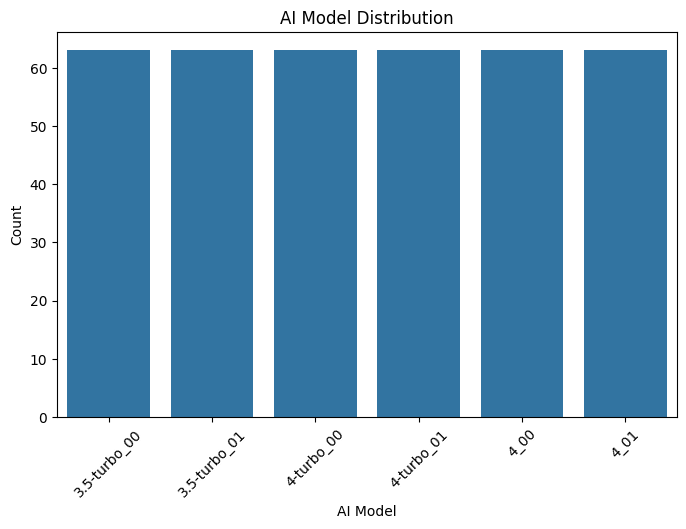

In [18]:
# Bar chart for AI models
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ai_model', order=df['ai_model'].value_counts().index)
plt.title('AI Model Distribution')
plt.xlabel('AI Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

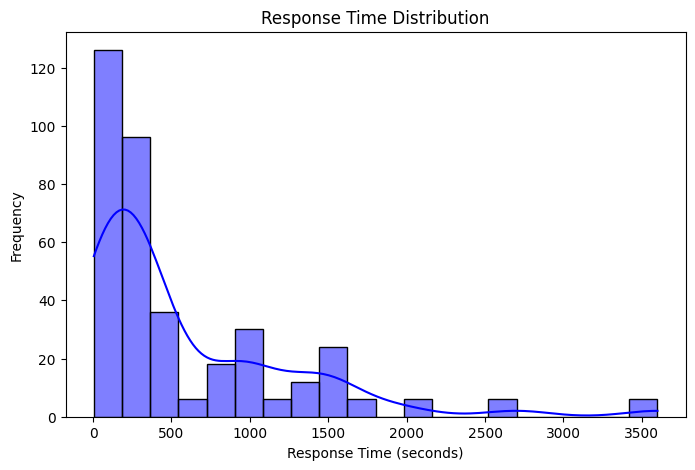

In [19]:
# Histogram for response time
plt.figure(figsize=(8, 5))
sns.histplot(df['response_time'], kde=True, bins=20, color='blue')
plt.title('Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()


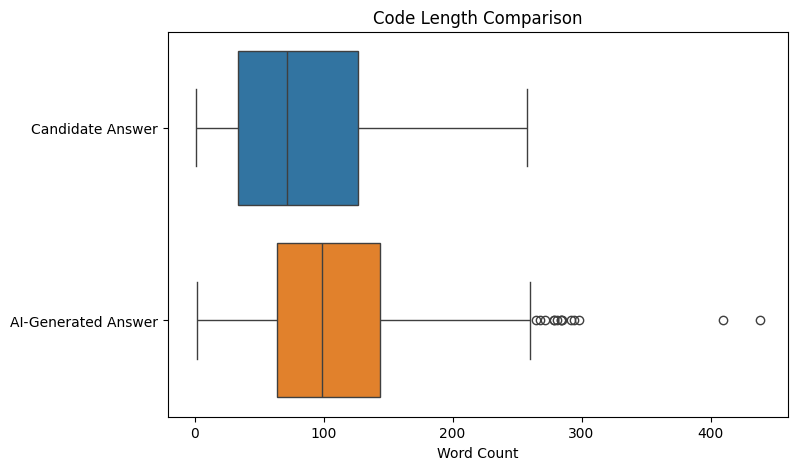

In [20]:
# Boxplot for candidate vs AI-generated code length
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['candidate_length', 'ai_generated_length']], orient='h')
plt.title('Code Length Comparison')
plt.xlabel('Word Count')
plt.yticks([0, 1], ['Candidate Answer', 'AI-Generated Answer'])
plt.show()